# Opis zbioru danych

#### class - Trujący = p, jadalny = e (binarny)
#### cap-diameter -  średnica kapelusza (m): liczba zmiennopozycyjna w cm
#### cap-shape - kształt czapki (n): dzwon=b, stożkowy=c, wypukły=x, płaski=f,      zatopiony=s, kulisty=p, inny=o
#### cap-surface - powierzchnia czapeczki (n): włóknista=i, rowki=g, łuskowata=y, gładka=s, błyszcząca=h, skórzasta=l, jedwabista=k, lepka=t, pomarszczony=w, mięsisty=e
#### cap-color - kolor czapki (n): brązowy=n, buff=b, szary=g, zielony=r, różowy=p, fioletowy=u, czerwony=e, biały=w, żółty=y, niebieski=l, 					orange=o, black=k,
#### does-bruise-bleed - siniak-krwawienie (n): Siniak-krwawienie = t, nie = f
#### gill-attachment (n) - Przyłączanie skrzelowe (n): Adapter = a, adnestor = x, deurrata = d, wolny = e, sinuate = s, pory = p, brak = f, nieznane =?
#### gill-spacing (n) - odstępy między skrzelami (n): close=c, distant=d, none=f
#### gill-color - kolor skrzeli (n): patrz kolor kapelusza + brak=f
#### stem-height - wysokość łodygi (m): liczba zmiennoprzecinkowa w cm
#### stem-width (m) - szerokość łodygi (m): liczba zmiennoprzecinkowa w mm
#### stem-root (n) -  korzeń łodygi (n): bulwiasty=b, spuchnięty=s, klubowy=c, kubkowy=u, równy=e, rizomorfy=z, ukorzenione=r
#### stem-surface (n) - powierzchnia łodygi (n): patrz powierzchnia pokrywy + brak=f
#### stem-color (n) - Patrz kolor-kolor + brak = f
#### veil-type (n) - typ welonu (n): Częściowy = p, uniwersalny = u
#### veil-color (n) - kolor welonu (n): Patrz kolor-kolor + brak = f
#### has-ring (n) - w pierścieniu (n): Ring = t, brak = f
#### ring-type (n) - Cobwebby = c, evanescencja = e, flar = r, rowek = g, duży = l, wisiorek = p, powłokę = s, strefa = z, skaly = y, ruchomy = m, żaden = f, nieznany =?
#### spore-print-color (n): - kolor zarodników (n): Patrz kolor trzonka
#### habitat (n) - siedlisko (n): Trawy = g, liście = l, łąki = m, ścieżki = p, wrzosowiska = h, Miejskie = u, odpady = w, las = d
#### season (n) - sezon (n): Wiosna = s, lato = u, jesień = a, zima = w

# Importowanie bibliotek

In [58]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

from functools import total_ordering

# Wczytywanie danych

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('secondary_data.csv', sep=';')

In [4]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [5]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

# Analiza danych

### Sprawdzanie łącznej liczby brakujących wartości

In [7]:
df.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

### Pobieranie wartości kategorialnych w kolumnie za pomocą funkcji value_counts().

In [8]:
df['class'].value_counts()

p    33888
e    27181
Name: class, dtype: int64

In [9]:
df['cap-shape'].value_counts()

x    26934
f    13404
s     7164
b     5694
o     3460
p     2598
c     1815
Name: cap-shape, dtype: int64

In [10]:
df['cap-surface'].value_counts()

t    8196
s    7608
y    6341
h    4974
g    4724
d    4432
e    2584
k    2303
i    2225
w    2150
l    1412
Name: cap-surface, dtype: int64

In [11]:
df['cap-surface'].replace(to_replace = np.nan, value = 'ccc', inplace= True)

In [12]:
df['cap-color'].value_counts()

n    24218
y     8543
w     7666
g     4420
e     4035
o     3656
r     1782
u     1709
p     1703
k     1279
b     1230
l      828
Name: cap-color, dtype: int64

In [13]:
df['does-bruise-or-bleed'].value_counts()

f    50479
t    10590
Name: does-bruise-or-bleed, dtype: int64

In [14]:
df['gill-attachment'].value_counts()

a    12698
d    10247
x     7413
p     6001
e     5648
s     5648
f     3530
Name: gill-attachment, dtype: int64

In [15]:
df['gill-attachment'].replace(to_replace=np.nan, value = 'ccc', inplace = True)

In [16]:
df['gill-spacing'].value_counts()

c    24710
d     7766
f     3530
Name: gill-spacing, dtype: int64

In [17]:
df['gill-spacing'].replace(to_replace = np.nan, value = 'ccc', inplace= True)

In [18]:
df['gill-color'].value_counts()

w    18521
n     9645
y     9546
p     5983
g     4118
f     3530
o     2909
k     2375
r     1399
e     1066
u     1023
b      954
Name: gill-color, dtype: int64

In [19]:
df['stem-root'].value_counts()

s    3177
b    3177
r    1412
f    1059
c     706
Name: stem-root, dtype: int64

In [20]:
df['stem-root'].replace(to_replace=np.nan, value = 'ccc', inplace = True)

In [21]:
df['stem-surface'].value_counts()

s    6025
y    4940
i    4396
t    2644
g    1765
k    1581
f    1059
h     535
Name: stem-surface, dtype: int64

In [22]:
df['stem-surface'].replace(to_replace=np.nan, value = 'ccc', inplace = True)

In [23]:
df['stem-color'].value_counts()

w    22926
n    18063
y     7865
g     2626
o     2187
e     2050
u     1490
f     1059
p     1025
k      837
r      542
l      226
b      173
Name: stem-color, dtype: int64

In [24]:
df['veil-type'].value_counts()

u    3177
Name: veil-type, dtype: int64

In [25]:
df['veil-type'].replace(to_replace=np.nan, value = 'ccc', inplace = True)

In [26]:
df['veil-color'].value_counts()

w    5474
y     527
n     525
u     353
k     353
e     181
Name: veil-color, dtype: int64

In [27]:
df['veil-color'].replace(to_replace=np.nan, value = 'ccc', inplace = True)

In [28]:
df['has-ring'].value_counts()

f    45890
t    15179
Name: has-ring, dtype: int64

In [29]:
df['ring-type'].value_counts()

f    48361
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: ring-type, dtype: int64

In [30]:
df['ring-type'].replace(to_replace=np.nan, value = 'ccc', inplace = True)

In [31]:
df['spore-print-color'].value_counts()

k    2118
p    1259
w    1212
n    1059
g     353
u     182
r     171
Name: spore-print-color, dtype: int64

In [32]:
df['spore-print-color'].replace(to_replace=np.nan, value = 'ccc', inplace = True)

In [33]:
df['habitat'].value_counts()

d    44209
g     7943
l     3168
m     2920
h     2001
p      360
w      353
u      115
Name: habitat, dtype: int64

In [34]:
df['season'].value_counts()

a    30177
u    22898
w     5267
s     2727
Name: season, dtype: int64

## Przetwarzanie categorialnych danych w liczby i zapisywanie do zbioru danych

In [35]:
df['class1'] = df['class'].factorize(['p','e'])[0]
df['cap-shape1'] = df['cap-shape'].factorize(['c','d','f'])[0]
df['cap-surface1'] = df['cap-surface'].factorize(['ccc','t','s','y','h','g','d','e','k','i','w','l'])[0]
df['cap-color1'] = df['cap-color'].factorize(['n','y','w','g','e','o','r','u','p','k','b','l'])[0]
df['does-bruise-or-bleed1'] = df['does-bruise-or-bleed'].factorize(['f','t'])[0]
df['gill-attachment1'] = df['gill-attachment'].factorize(['ccc','a','d','x','p','e','s','f'])[0]
df['gill-spacing1'] = df['gill-spacing'].factorize(['a','c','d','f'])[0]
df['gill-color1'] = df['gill-color'].factorize(['w','n','y','p','g','f','o','k','r','e','u','b'])[0]
df['stem-root1'] = df['stem-root'].factorize(['ccc','s','b','r','f','c'])[0]
df['stem-surface1'] = df['stem-surface'].factorize(['ccc','s','y','i','t','g','k','f','h'])[0]
df['stem-color1'] = df['stem-color'].factorize(['w','n', 'y', 'g', 'o', 'e', 'u', 'f','p', 'k', 'r', 'l', 'b'])[0]
df['veil-type1'] = df['veil-type'].factorize(['ccc','u'])[0]
df['veil-color1'] = df['veil-color'].factorize(['ccc','w','y','n','u','k','e'])[0]
df['has-ring1'] = df['has-ring'].factorize(['f','t'])[0]
df['ring-type1'] = df['ring-type'].factorize(['ccc','f','e','z','l','r','p','g','m'])[0]
df['spore-print-color1'] = df['spore-print-color'].factorize(['ccc','k','p','w','n','g','u','r'])[0]
df['habitat1'] = df['habitat'].factorize(['d','g', 'l', 'm', 'h', 'p', 'w', 'u'])[0]
df['season1'] = df['season'].factorize(['a','u', 'w', 's'])[0]

In [36]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class1,cap-shape1,cap-surface1,cap-color1,does-bruise-or-bleed1,gill-attachment1,gill-spacing1,gill-color1,stem-root1,stem-surface1,stem-color1,veil-type1,veil-color1,has-ring1,ring-type1,spore-print-color1,habitat1,season1
0,p,15.26,x,g,o,f,e,ccc,w,16.95,17.09,s,y,w,u,w,t,g,ccc,d,w,1,6,3,6,0,3,1,10,5,8,11,1,5,1,3,0,0,3
1,p,16.60,x,g,o,f,e,ccc,w,17.99,18.19,s,y,w,u,w,t,g,ccc,d,u,1,6,3,6,0,3,1,10,5,8,11,1,5,1,3,0,0,2
2,p,14.07,x,g,o,f,e,ccc,w,17.80,17.74,s,y,w,u,w,t,g,ccc,d,w,1,6,3,6,0,3,1,10,5,8,11,1,5,1,3,0,0,3
3,p,14.17,f,h,e,f,e,ccc,w,15.77,15.98,s,y,w,u,w,t,p,ccc,d,w,1,2,4,1,0,3,1,10,5,8,11,1,5,1,6,0,0,3
4,p,14.64,x,h,o,f,e,ccc,w,16.53,17.20,s,y,w,u,w,t,p,ccc,d,w,1,6,4,6,0,3,1,10,5,8,11,1,5,1,6,0,0,3


## Sprawdzenie zduplikowanych danych

In [37]:
df.duplicated().any()

True

## Usunięcie zduplikowanych danych

In [38]:
df1 = df.drop_duplicates(keep='first')

In [39]:
df1.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class1,cap-shape1,cap-surface1,cap-color1,does-bruise-or-bleed1,gill-attachment1,gill-spacing1,gill-color1,stem-root1,stem-surface1,stem-color1,veil-type1,veil-color1,has-ring1,ring-type1,spore-print-color1,habitat1,season1
0,p,15.26,x,g,o,f,e,ccc,w,16.95,17.09,s,y,w,u,w,t,g,ccc,d,w,1,6,3,6,0,3,1,10,5,8,11,1,5,1,3,0,0,3
1,p,16.60,x,g,o,f,e,ccc,w,17.99,18.19,s,y,w,u,w,t,g,ccc,d,u,1,6,3,6,0,3,1,10,5,8,11,1,5,1,3,0,0,2
2,p,14.07,x,g,o,f,e,ccc,w,17.80,17.74,s,y,w,u,w,t,g,ccc,d,w,1,6,3,6,0,3,1,10,5,8,11,1,5,1,3,0,0,3
3,p,14.17,f,h,e,f,e,ccc,w,15.77,15.98,s,y,w,u,w,t,p,ccc,d,w,1,2,4,1,0,3,1,10,5,8,11,1,5,1,6,0,0,3
4,p,14.64,x,h,o,f,e,ccc,w,16.53,17.20,s,y,w,u,w,t,p,ccc,d,w,1,6,4,6,0,3,1,10,5,8,11,1,5,1,6,0,0,3


In [41]:
df1.duplicated().any()

False

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60923 entries, 0 to 61068
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   class                  60923 non-null  object 
 1   cap-diameter           60923 non-null  float64
 2   cap-shape              60923 non-null  object 
 3   cap-surface            60923 non-null  object 
 4   cap-color              60923 non-null  object 
 5   does-bruise-or-bleed   60923 non-null  object 
 6   gill-attachment        60923 non-null  object 
 7   gill-spacing           60923 non-null  object 
 8   gill-color             60923 non-null  object 
 9   stem-height            60923 non-null  float64
 10  stem-width             60923 non-null  float64
 11  stem-root              60923 non-null  object 
 12  stem-surface           60923 non-null  object 
 13  stem-color             60923 non-null  object 
 14  veil-type              60923 non-null  object 
 15  ve

# Wizualizacja danych

Text(0.5, 1.0, 'Liczba trujących i jadalnych grzybów w zbiorze danych')

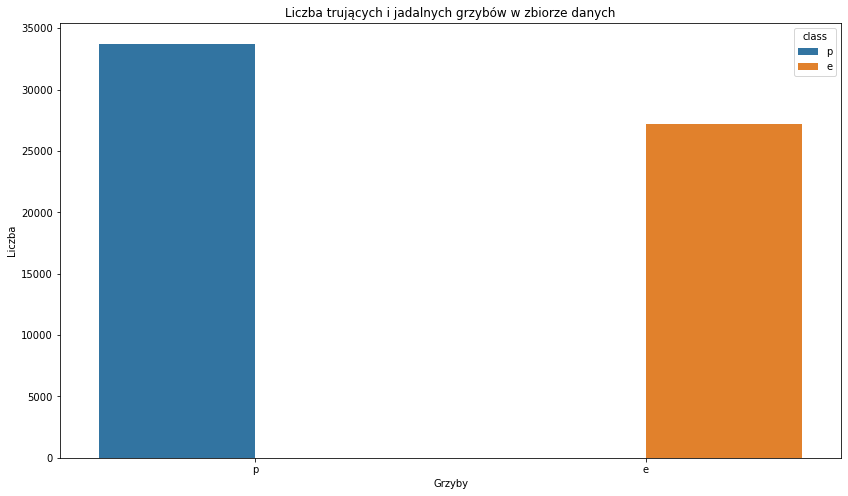

In [47]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'class', data = df1, hue='class')
plt.xlabel('Grzyby')
plt.ylabel('Liczba')
plt.title('Liczba trujących i jadalnych grzybów w zbiorze danych')

Text(0.5, 1.0, 'Liczba trujących i jadalnych grzybów w zależności od środowiska')

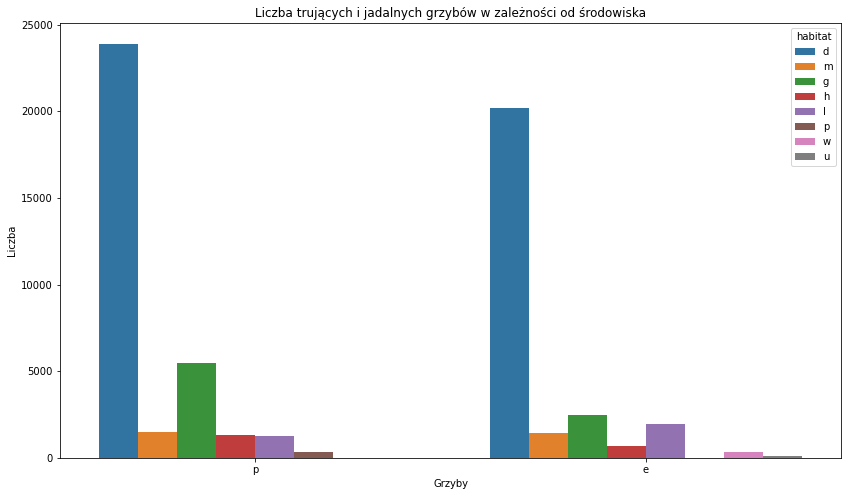

In [48]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'class', hue='habitat', data = df1)
plt.xlabel('Grzyby')
plt.ylabel('Liczba')
plt.title('Liczba trujących i jadalnych grzybów w zależności od środowiska')

Text(0.5, 1.0, 'Liczba trujących i jadalnych grzybów w zależności od sezonu, kiedy grzyby rasną')

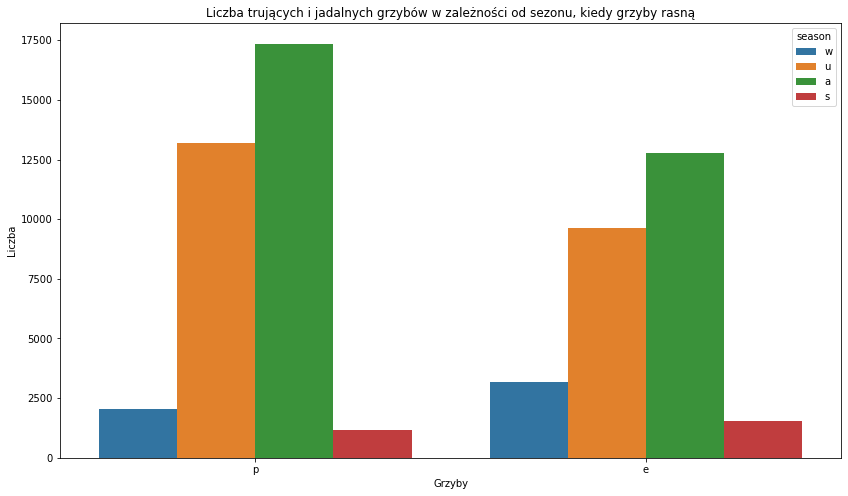

In [49]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'class', hue='season', data = df1)
plt.xlabel('Grzyby')
plt.ylabel('Liczba')
plt.title('Liczba trujących i jadalnych grzybów w zależności od sezonu, kiedy grzyby rasną')

Text(0.5, 1.0, '')

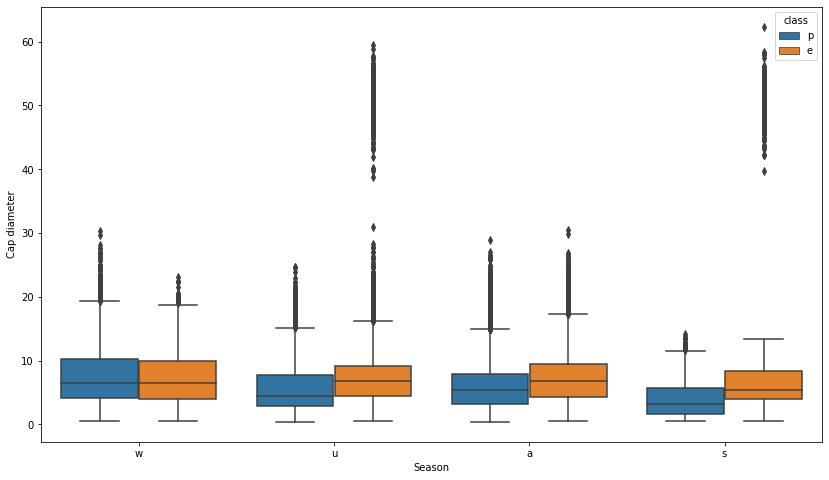

In [53]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df1, x = 'season', y = 'cap-diameter', hue='class')
plt.xlabel('Sezon')
plt.ylabel('Średnica czapki')
plt.title('Zależność średnicy czapki grzybów trujących i jadalnych od sezonu')

Text(0.5, 1.0, '')

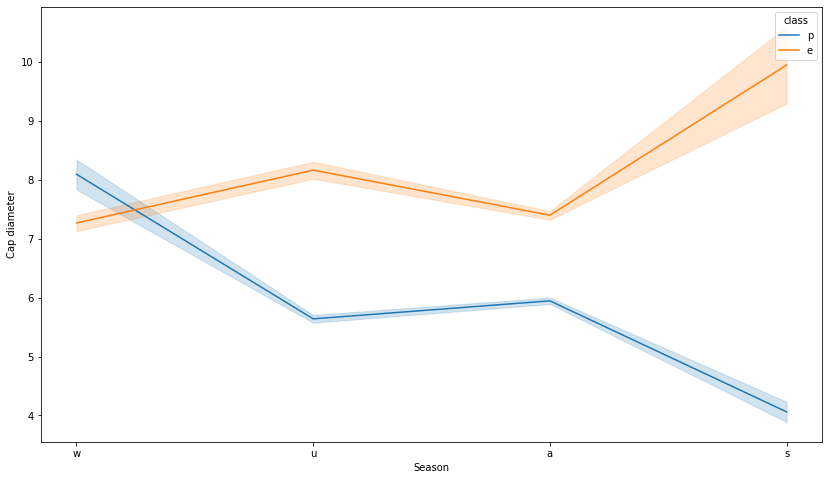

In [54]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df1, x = 'season', y = 'cap-diameter', hue='class')
plt.xlabel('Sezon')
plt.ylabel('Średnica czapki')
plt.title('Zależność średnicy czapki grzybów trujących i jadalnych od sezonu')

Text(0.5, 1.0, '')

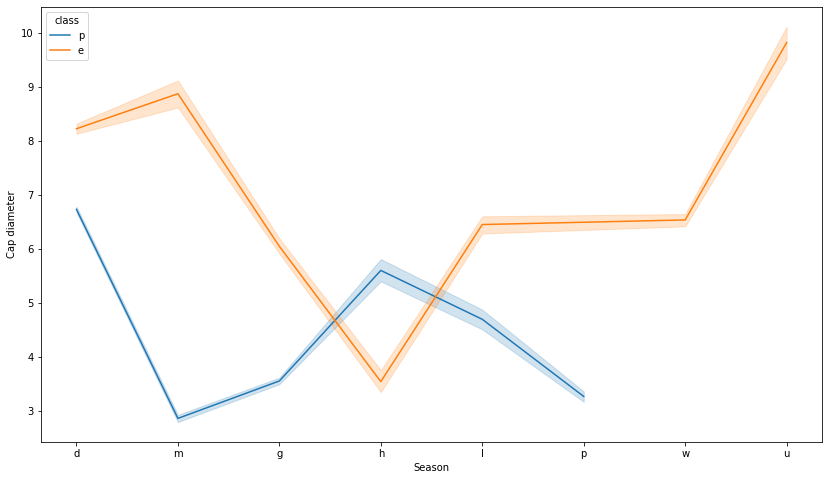

In [55]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df1, x = 'habitat', y = 'cap-diameter', hue='class')
plt.xlabel('Środowisko')
plt.ylabel('Średnica czapki')
plt.title('Zależność średnicy czapki grzybów trujących i jadalnych od środowiska')

Text(0.5, 1.0, 'Kolor czapek grzybów trujacych i jadalnych')

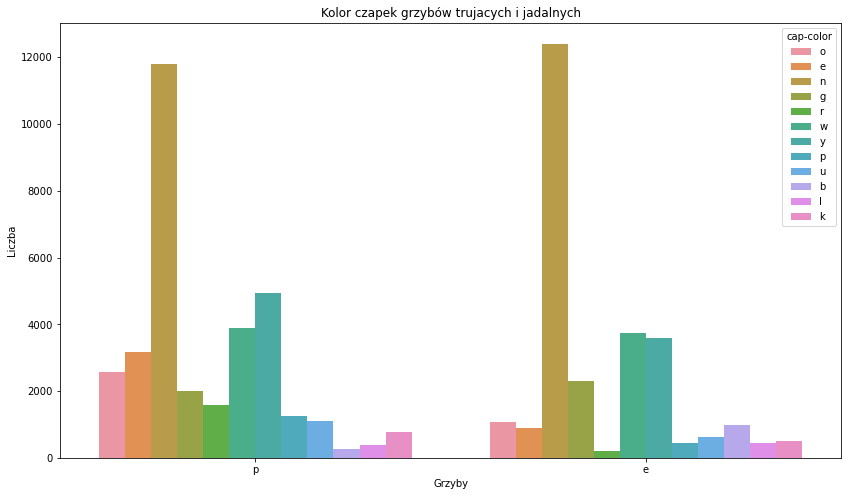

In [50]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'class', hue='cap-color', data = df1)
plt.xlabel('Grzyby')
plt.ylabel('Liczba')
plt.title('Kolor czapek grzybów trujacych i jadalnych')

Text(0.5, 1.0, 'Zależność średnicy czapki grzybów od wysokości nóżki')

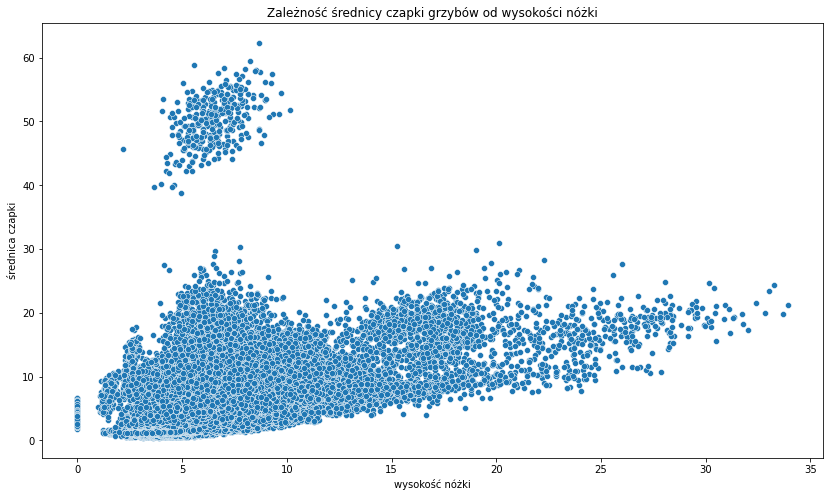

In [53]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df1, x="stem-height", y="cap-diameter" )
plt.xlabel('wysokość nóżki')
plt.ylabel('średnica czapki')
plt.title('Zależność średnicy czapki grzybów od wysokości nóżki')

Text(0.5, 1.0, 'Zależność wysokości nóżki grzybów od szerokości nóżki')

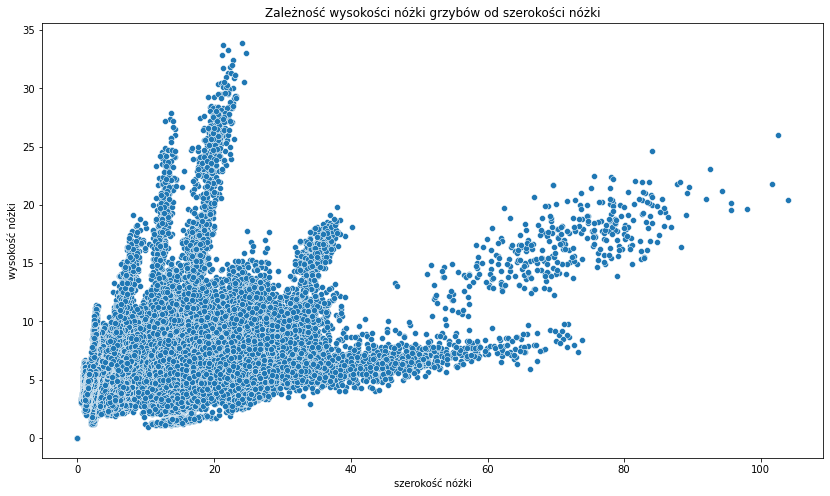

In [54]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df1, x="stem-width", y="stem-height")
plt.xlabel('szerokość nóżki')
plt.ylabel('wysokość nóżki')
plt.title('Zależność wysokości nóżki grzybów od szerokości nóżki')

Text(0.5, 1.0, 'Kształt czapki grybów trujących i jadalnych')

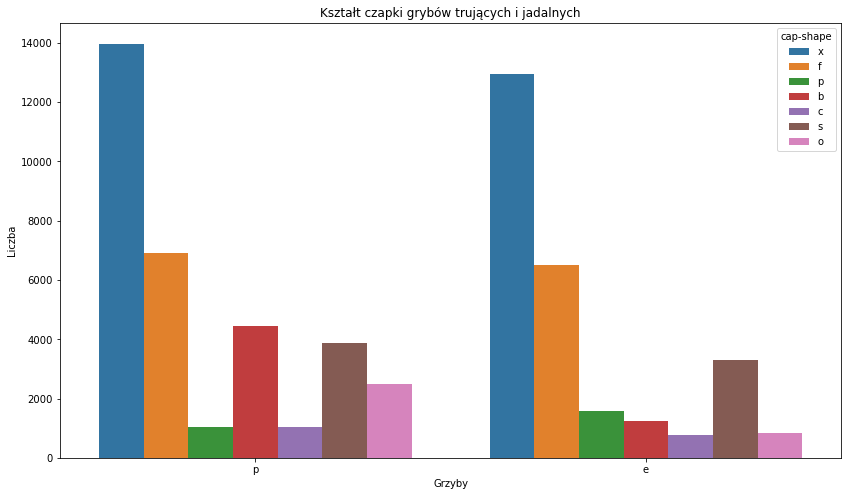

In [55]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'class', hue='cap-shape', data = df1)
plt.xlabel('Grzyby')
plt.ylabel('Liczba')
plt.title('Kształt czapki grybów trujących i jadalnych')

Text(0.5, 1.0, 'Zależność średnicy czapki od kszrałtu czapki grzybów trujących i jadalnych')

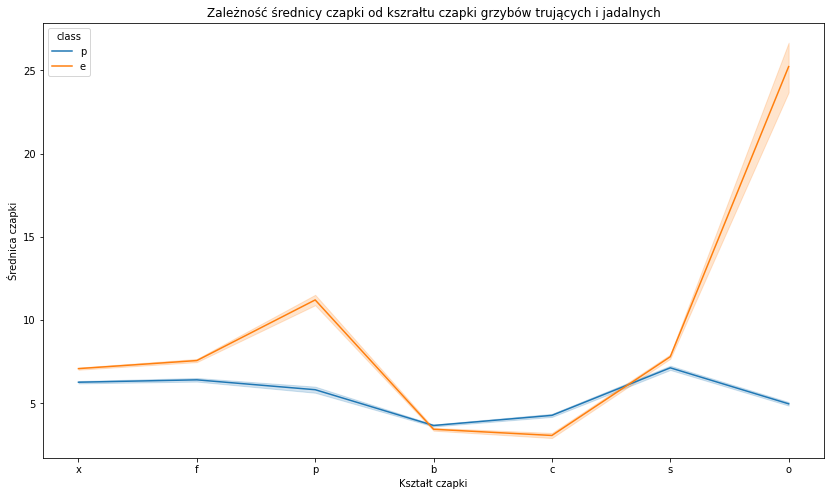

In [56]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df1, x = 'cap-shape', y = 'cap-diameter', hue='class')
plt.xlabel('Kształt czapki')
plt.ylabel('Średnica czapki')
plt.title('Zależność średnicy czapki od kszrałtu czapki grzybów trujących i jadalnych')

Text(0.5, 1.0, 'Liczba trujących i jadalnych grzybów który mają ringi')

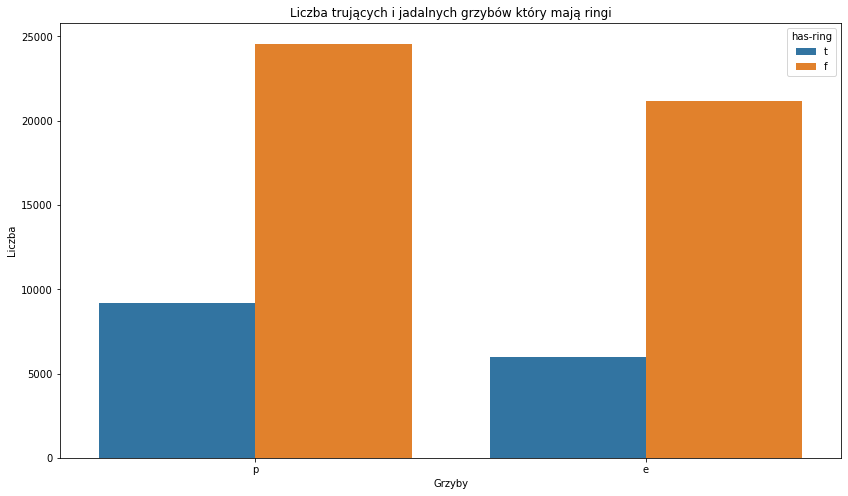

In [57]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'class', data = df1, hue='has-ring')
plt.xlabel('Grzyby')
plt.ylabel('Liczba')
plt.title('Liczba trujących i jadalnych grzybów który mają ringi')

Text(0.5, 1.0, '')

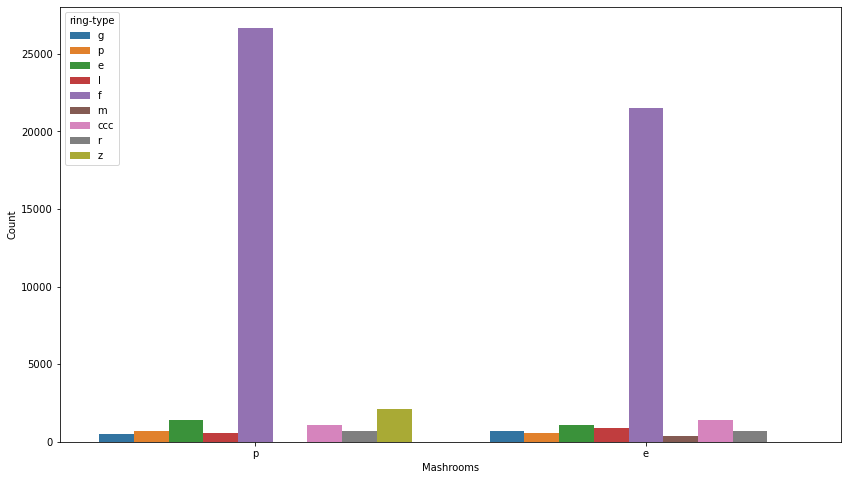

In [65]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'class', data = df1, hue='ring-type')
plt.xlabel('Mashrooms')
plt.ylabel('Count')
plt.title('')

# Tworzenie zbioru treningowego i testowego

In [59]:
from functools import total_ordering
def plot_confusion_matrix(confusion_matrix, classes, title=None,
                          title_appendix='',
                          cmap=plt.cm.Blues):
    # tytuł wykresu
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    fig, ax = plt.subplots()
    # rysuje CM
    img = ax.imshow(confusion_matrix, cmap=cmap)
    # dodaje pasek z boku
    ax.figure.colorbar(img, ax=ax)
    # dodatki do wykresu
    ax.set_xticks(np.arange(confusion_matrix.shape[1]))
    ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_yticks(np.arange(confusion_matrix.shape[0]))
    ax.set_yticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    # etykiety
    fmt = '.2f' if confusion_matrix.dtype == 'float' else 'd'
    thresh = confusion_matrix.max() / 2
    for y, row in enumerate(confusion_matrix):
        for x, cell in enumerate(row):
            ax.text(x, y, format(cell, fmt),
                    ha='center', va='center',
                    color='white' if cell > thresh else 'black')
    fig.tight_layout()
    return ax
def plot_confusion_matrix(confusion_matrix, classes, title=None,
                          title_appendix='',
                          cmap=plt.cm.Blues):
    # tytuł wykresu
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    fig, ax = plt.subplots()
    # rysuje CM
    img = ax.imshow(confusion_matrix, cmap=cmap)
    # dodaje pasek z boku
    ax.figure.colorbar(img, ax=ax)
    # dodatki do wykresu
    ax.set_xticks(np.arange(confusion_matrix.shape[1]))
    ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_yticks(np.arange(confusion_matrix.shape[0]))
    ax.set_yticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    # etykiety
    fmt = '.2f' if confusion_matrix.dtype == 'float' else 'd'
    thresh = confusion_matrix.max() / 2
    for y, row in enumerate(confusion_matrix):
        for x, cell in enumerate(row):
            ax.text(x, y, format(cell, fmt),
                    ha='center', va='center',
                    color='white' if cell > thresh else 'black')
    fig.tight_layout()
    return ax

In [60]:
from sklearn.preprocessing import Normalizer, StandardScaler

def preprocess_data(X, preprocessor=None):
  if preprocessor is not None:
    preprocessor.fit(X)
    X_prep=X.copy()
    X_prep[:]=preprocessor.transform(X.values)
  return X_prep

In [61]:
df1.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season', 'class1', 'cap-shape1', 'cap-surface1',
       'cap-color1', 'does-bruise-or-bleed1', 'gill-attachment1',
       'gill-spacing1', 'gill-color1', 'stem-root1', 'stem-surface1',
       'stem-color1', 'veil-type1', 'veil-color1', 'has-ring1', 'ring-type1',
       'spore-print-color1', 'habitat1', 'season1'],
      dtype='object')

In [62]:
X = df1.drop(['class', 'cap-shape', 'cap-surface', 'cap-color',
             'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
             'stem-root', 'stem-surface', 'stem-color',
             'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
             'habitat', 'season', 'class1'], axis=1)
y = df1['class1']

In [63]:
X.head()

,cap-diameter,stem-height,stem-width,cap-shape1,cap-surface1,cap-color1,does-bruise-or-bleed1,gill-attachment1,gill-spacing1,gill-color1,stem-root1,stem-surface1,stem-color1,veil-type1,veil-color1,has-ring1,ring-type1,spore-print-color1,habitat1,season1
0,15.26,16.95,17.09,6,3,6,0,3,1,10,5,8,11,1,5,1,3,0,0,3
1,16.60,17.99,18.19,6,3,6,0,3,1,10,5,8,11,1,5,1,3,0,0,2
2,14.07,17.80,17.74,6,3,6,0,3,1,10,5,8,11,1,5,1,3,0,0,3
3,14.17,15.77,15.98,2,4,1,0,3,1,10,5,8,11,1,5,1,6,0,0,3
4,14.64,16.53,17.20,6,4,6,0,3,1,10,5,8,11,1,5,1,6,0,0,3


In [64]:
X1=preprocess_data(X, StandardScaler())

C:\Users\lipov\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:
X1.head()

,cap-diameter,stem-height,stem-width,cap-shape1,cap-surface1,cap-color1,does-bruise-or-bleed1,gill-attachment1,gill-spacing1,gill-color1,stem-root1,stem-surface1,stem-color1,veil-type1,veil-color1,has-ring1,ring-type1,spore-print-color1,habitat1,season1
0,1.616820,3.082356,0.489669,0.913768,-0.498498,-0.047587,-0.458692,0.040746,0.193914,0.833875,3.26711,2.020642,0.796918,4.263363,2.8422,1.736897,0.407592,-0.297075,-0.493455,1.770316
1,1.871167,3.391996,0.599337,0.913768,-0.498498,-0.047587,-0.458692,0.040746,0.193914,0.833875,3.26711,2.020642,0.796918,4.263363,2.8422,1.736897,0.407592,-0.297075,-0.493455,0.861476
2,1.390945,3.335427,0.554473,0.913768,-0.498498,-0.047587,-0.458692,0.040746,0.193914,0.833875,3.26711,2.020642,0.796918,4.263363,2.8422,1.736897,0.407592,-0.297075,-0.493455,1.770316
3,1.409926,2.731032,0.379004,-0.954916,-0.246546,-1.625275,-0.458692,0.040746,0.193914,0.833875,3.26711,2.020642,0.796918,4.263363,2.8422,1.736897,2.348381,-0.297075,-0.493455,1.770316
4,1.499137,2.957308,0.500636,0.913768,-0.246546,-0.047587,-0.458692,0.040746,0.193914,0.833875,3.26711,2.020642,0.796918,4.263363,2.8422,1.736897,2.348381,-0.297075,-0.493455,1.770316


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=123)

In [67]:
X_test.shape

(12185, 20)

In [68]:
X_train.shape

(48738, 20)

# Regresja logistyczna

## Model1 

In [69]:
model1=LogisticRegression(random_state=123)
model1.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [70]:
y_pred_test1=model1.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred_test1))

              precision    recall  f1-score   support

           0       0.65      0.52      0.58      5443
           1       0.67      0.78      0.72      6742

    accuracy                           0.66     12185
   macro avg       0.66      0.65      0.65     12185
weighted avg       0.66      0.66      0.66     12185



<AxesSubplot:>

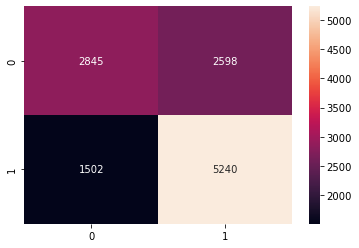

In [86]:
cm1=confusion_matrix(y_test, y_pred_test1)
sns.heatmap(cm1, annot=True, fmt='d')

### ROC Logistic regression

In [87]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_test1)

In [88]:
auc=roc_auc_score(y_test, y_pred_test1)
print('AUC: %.3f' % auc)

AUC: 0.650


## Model 1.2  max_iter = 150

In [89]:
model2=LogisticRegression(max_iter=150)
model2.fit(X_train, y_train)

LogisticRegression(max_iter=150)

In [90]:
y_pred_test2=model2.predict(X_test)

In [91]:
print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.65      0.52      0.58      5443
           1       0.67      0.78      0.72      6742

    accuracy                           0.66     12185
   macro avg       0.66      0.65      0.65     12185
weighted avg       0.66      0.66      0.66     12185



<AxesSubplot:>

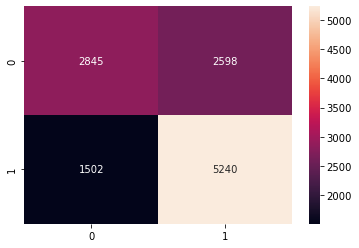

In [92]:
cm1=confusion_matrix(y_test, y_pred_test1)
sns.heatmap(cm1, annot=True, fmt='d')

## Model 1.3 Logistic_regresion  Undersampling

In [93]:
rus= RandomUnderSampler(random_state=123)
rus.fit(X, y)
X_under, y_under=rus.fit_resample(X,y)

In [94]:
y_under.value_counts()

0    27181
1    27181
Name: class1, dtype: int64

In [95]:
X_trainu, X_testu, y_trainu, y_testu = train_test_split(X_under, y_under, test_size=0.2, random_state=123)

In [96]:
modelu = LogisticRegression()
modelu.fit(X_trainu, y_trainu)

C:\Users\lipov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
y_pred_testu=modelu.predict(X_testu)

In [98]:
print(classification_report(y_testu, y_pred_testu))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      5370
           1       0.67      0.67      0.67      5503

    accuracy                           0.67     10873
   macro avg       0.66      0.66      0.66     10873
weighted avg       0.67      0.67      0.67     10873



<AxesSubplot:>

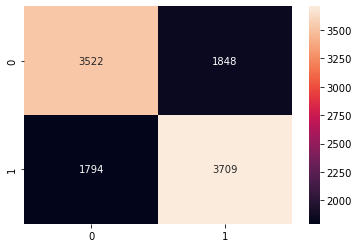

In [99]:
cmu=confusion_matrix(y_testu, y_pred_testu)
sns.heatmap(cmu, annot=True, fmt='d')

# KNN

## Model 2 KNN metric='minkowski'

In [100]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

In [101]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5443
           1       1.00      1.00      1.00      6742

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185



<AxesSubplot:>

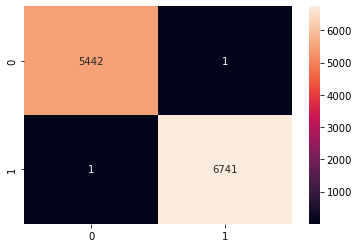

In [102]:
cmknn=confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cmknn, annot=True, fmt='d')

### ROC KNN metric='minkowski'

In [104]:
fprknn, tprknn, thresholdsknn=roc_curve(y_test, y_pred_knn)

In [105]:
aucknn=roc_auc_score(y_test, y_pred_knn)
print('AUC: %.3f' % aucknn)

AUC: 1.000


## Model 2.1 KNN metric='chebyshev'

In [106]:
knn2=KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn2.fit(X_train, y_train)
y_pred_knn2=knn2.predict(X_test)

In [107]:
print(classification_report(y_test, y_pred_knn2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5443
           1       1.00      1.00      1.00      6742

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185



<AxesSubplot:>

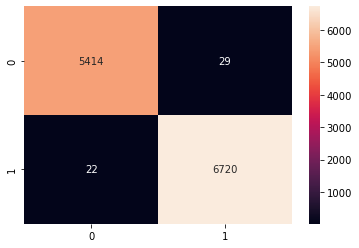

In [108]:
cmkn1=confusion_matrix(y_test, y_pred_knn2)
sns.heatmap(cmkn1, annot=True, fmt='d')

## Model 2.2 KNN metric='manhattan'

In [109]:
knn3=KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn3.fit(X_train, y_train)
y_pred_knn3=knn3.predict(X_test)

In [110]:
print(classification_report(y_test, y_pred_knn3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5443
           1       1.00      1.00      1.00      6742

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185



<AxesSubplot:>

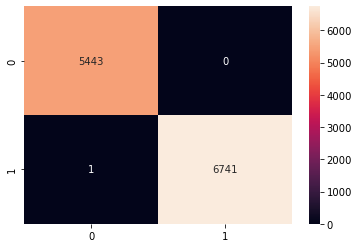

In [111]:
cmkn3=confusion_matrix(y_test, y_pred_knn3)
sns.heatmap(cmkn3, annot=True, fmt='d')

#  Model 3 Naive Bayes

In [112]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=123)

In [113]:
mnb=MultinomialNB()
mnb.fit(X_train1, y_train1)
y_mnb=mnb.predict(X_test1)

In [114]:
print(classification_report(y_test, y_mnb))

              precision    recall  f1-score   support

           0       0.56      0.49      0.52      5443
           1       0.62      0.69      0.65      6742

    accuracy                           0.60     12185
   macro avg       0.59      0.59      0.59     12185
weighted avg       0.59      0.60      0.59     12185



<AxesSubplot:>

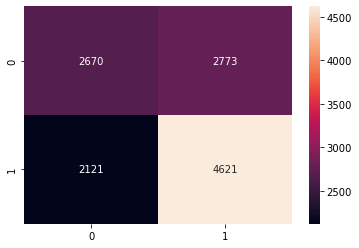

In [115]:
cmb=confusion_matrix(y_test, y_mnb)
sns.heatmap(cmb, annot=True, fmt='d')

### ROC Naive Bayes

In [116]:
fprnb, tprnb, thresholdsnb=roc_curve(y_test, y_mnb)

In [117]:
aucnb=roc_auc_score(y_test, y_mnb)
print('AUC: %.3f' % aucnb)

AUC: 0.588


# Model 4 Drzewo decyzyjne

In [118]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_dt=dt.predict(X_test)

In [119]:
print(classification_report(y_test, y_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5443
           1       1.00      1.00      1.00      6742

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185



<AxesSubplot:>

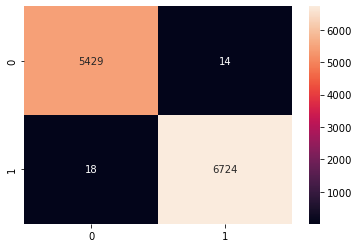

In [120]:
cmdt=confusion_matrix(y_test, y_dt)
sns.heatmap(cmdt, annot=True, fmt='d')

### ROC Drzewo decyzyjne

In [121]:
fprdt, tprdt, thresholdsdt=roc_curve(y_test, y_dt)

In [122]:
aucdt=roc_auc_score(y_test, y_dt)
print('AUC: %.3f' % aucdt)

AUC: 0.997


# Bagging - Bootstrap aggregation

## Model 5 BaggingClassifier base_estimator = DecisionTreeClassifier

In [126]:
bg = BaggingClassifier(base_estimator=DecisionTreeClassifier())
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [127]:
y_bg=bg.predict(X_test)

In [128]:
print(classification_report(y_test, y_bg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5443
           1       1.00      1.00      1.00      6742

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185



<AxesSubplot:>

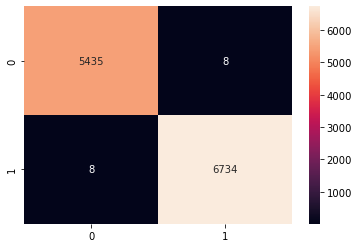

In [129]:
cmbg=confusion_matrix(y_test, y_bg)
sns.heatmap(cmbg, annot=True, fmt='d')

## Model 5.1 BaggingClassifier base_estimator = GaussianNB

In [130]:
bg1 = BaggingClassifier(base_estimator=GaussianNB())
bg1.fit(X_train, y_train)

BaggingClassifier(base_estimator=GaussianNB())

In [131]:
y_bg1=bg1.predict(X_test)

In [132]:
print(classification_report(y_test, y_bg1))

              precision    recall  f1-score   support

           0       0.60      0.47      0.53      5443
           1       0.64      0.74      0.68      6742

    accuracy                           0.62     12185
   macro avg       0.62      0.61      0.61     12185
weighted avg       0.62      0.62      0.61     12185



<AxesSubplot:>

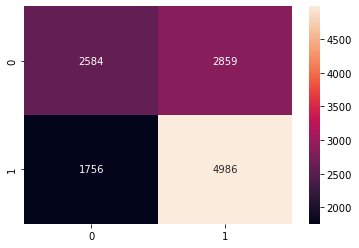

In [133]:
cmbg1=confusion_matrix(y_test, y_bg1)
sns.heatmap(cmbg1, annot=True, fmt='d')

# Model 6 Boosting AdaBoost

In [134]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

In [135]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      5443
           1       0.80      0.83      0.81      6742

    accuracy                           0.79     12185
   macro avg       0.79      0.79      0.79     12185
weighted avg       0.79      0.79      0.79     12185



<AxesSubplot:>

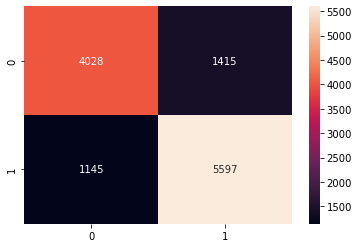

In [136]:
cmada=confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cmada, annot=True, fmt='d')

### ROC boosting

In [137]:
fprbos, tprbos, thresholdsbos=roc_curve(y_test, y_pred_ada)

In [138]:
aucbos=roc_auc_score(y_test, y_pred_ada)
print('AUC: %.3f' % aucbos)

AUC: 0.785


# Krzywa ROC - Receiver Operating Characteristic

In [140]:
help_prob=[0 for _ in range(len(y_test))]
help_fpr, help_tpr, _=roc_curve(y_test, help_prob)

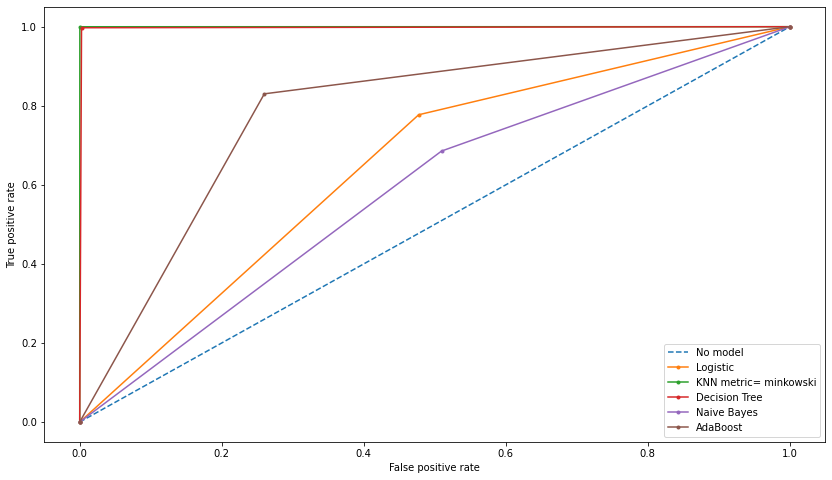

In [141]:
plt.figure(figsize=(14,8))
plt.plot(help_fpr, help_tpr, linestyle='--', label='No model')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.plot(fprknn, tprknn, marker = '.', label = 'KNN metric= minkowski')
plt.plot(fprdt, tprdt, marker = '.', label = 'Decision Tree')
plt.plot(fprnb, tprnb, marker = '.', label = 'Naive Bayes')
plt.plot(fprbos, tprbos, marker = '.', label = 'AdaBoost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

## Wyniki
### Najlepszym modelem klasyfikacyjnym dla naszego zbioru danych są TreeDecision i KNN. Te modele mają nallepsze metryki: 
   ### f1-score = 1.0 (średnia harmoniczna, im wyższy F1 Score tym lepszy model)
   ### Precision (precyzja) = 1.0 (sprawdza pewność klasyfikatora dla przykładów pozytywnych) 
   ### Recall (czułość) = 1.0 (określa jaką część dodatnich wyników wykrył klasyfikator. 1 oznacza, że wykryto     wszystkie pozytywne przykłady, 0 - nie wykryto żadnego)
   ### Accuracy (dokładność) = 1.0 procent poprawnie zaklasyfikowanych przykładów